In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trans_df = pd.read_csv("dataset/train_transaction.csv")
iden_df = pd.read_csv("dataset/train_identity.csv")

In [3]:
trans_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
iden_df

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [5]:
trans_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


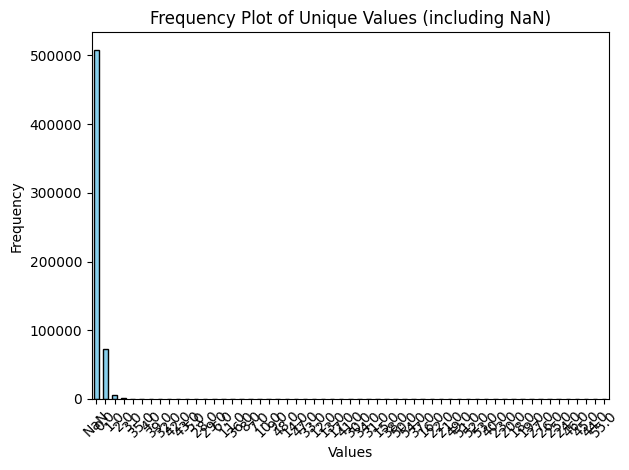

In [6]:
value_counts = trans_df['V330'].value_counts(dropna=False)

# Plot
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency Plot of Unique Values (including NaN)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Customize label for NaN
labels = [str(x) if pd.notna(x) else 'NaN' for x in value_counts.index]
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.tight_layout()
plt.show()

In [7]:
trans_df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [8]:
for i in trans_df.columns:
    print(i)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167

In [9]:
dic = {}
for i in trans_df.columns:
    dic[i]=int(trans_df[i].isna().sum())
dic

{'TransactionID': 0,
 'isFraud': 0,
 'TransactionDT': 0,
 'TransactionAmt': 0,
 'ProductCD': 0,
 'card1': 0,
 'card2': 8933,
 'card3': 1565,
 'card4': 1577,
 'card5': 4259,
 'card6': 1571,
 'addr1': 65706,
 'addr2': 65706,
 'dist1': 352271,
 'dist2': 552913,
 'P_emaildomain': 94456,
 'R_emaildomain': 453249,
 'C1': 0,
 'C2': 0,
 'C3': 0,
 'C4': 0,
 'C5': 0,
 'C6': 0,
 'C7': 0,
 'C8': 0,
 'C9': 0,
 'C10': 0,
 'C11': 0,
 'C12': 0,
 'C13': 0,
 'C14': 0,
 'D1': 1269,
 'D2': 280797,
 'D3': 262878,
 'D4': 168922,
 'D5': 309841,
 'D6': 517353,
 'D7': 551623,
 'D8': 515614,
 'D9': 515614,
 'D10': 76022,
 'D11': 279287,
 'D12': 525823,
 'D13': 528588,
 'D14': 528353,
 'D15': 89113,
 'M1': 271100,
 'M2': 271100,
 'M3': 271100,
 'M4': 281444,
 'M5': 350482,
 'M6': 169360,
 'M7': 346265,
 'M8': 346252,
 'M9': 346252,
 'V1': 279287,
 'V2': 279287,
 'V3': 279287,
 'V4': 279287,
 'V5': 279287,
 'V6': 279287,
 'V7': 279287,
 'V8': 279287,
 'V9': 279287,
 'V10': 279287,
 'V11': 279287,
 'V12': 76073,
 

In [10]:
trans_df[trans_df["isFraud"]==1]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590361,3577361,1,15807368,1224.000,W,3278,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590364,3577364,1,15807516,69.964,C,5812,408.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590368,3577368,1,15807677,100.000,H,6758,399.0,150.0,american express,146.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590372,3577372,1,15807758,117.000,W,14037,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
trans_df.select_dtypes(exclude=["number"])

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,W,visa,debit,NaN,NaN,T,T,T,M0,T,F,F,F,T
590536,W,mastercard,debit,gmail.com,NaN,T,F,F,M0,F,T,F,F,F
590537,W,mastercard,debit,gmail.com,NaN,T,F,F,NaN,NaN,T,NaN,NaN,NaN
590538,W,mastercard,debit,aol.com,NaN,T,T,T,M0,F,T,NaN,NaN,NaN


In [12]:
trans_df.drop(columns=[
    'R_emaildomain',
    'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11', 'D12', 'D13', 'D14',
    'M1', 'M2', 'M3', 'M4', 'M5', 'M7', 'M8', 'M9',
    *[f'V{i}' for i in range(1, 12)],
    *[f'V{i}' for i in range(138, 279)],
    *[f'V{i}' for i in range(322, 340)]
], inplace=True)

In [13]:
trans_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [17]:
trans_df['V318'].value_counts(dropna=False)

V318
0.000000       535074
117.000000       1937
59.000000        1586
100.000000        991
226.000000        873
                ...  
381.500000          1
1238.000000         1
253.990005          1
1771.410034         1
55.493999           1
Name: count, Length: 12310, dtype: int64

In [19]:
trans_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# CRAZY PREPROCESSING PIPELINE 🤪

# 1. CHAOTIC FEATURE ENGINEERING
print("🌪️ UNLEASHING CHAOTIC FEATURE ENGINEERING 🌪️")

# Make a copy to avoid modifying original
wild_df = trans_df.copy()

# Create cyclical time features and explode them
if 'TransactionDT' in wild_df.columns:
    wild_df['sin_time'] = np.sin(wild_df['TransactionDT'] / (24*60*60))
    wild_df['cos_time'] = np.cos(wild_df['TransactionDT'] / (24*60*60))
    wild_df['tan_time'] = np.tan(wild_df['TransactionDT'] % (12*60*60) / (12*60*60) * np.pi)

# Create fractal features from numeric columns
numeric_cols = wild_df.select_dtypes(include=['number']).columns
for col in numeric_cols[:5]:  # Limit to prevent explosion
    if wild_df[col].nunique() > 5:  # Only for columns with sufficient unique values
        wild_df[f'log_{col}'] = np.log1p(np.abs(wild_df[col]))
        wild_df[f'sqrt_{col}'] = np.sqrt(np.abs(wild_df[col]))
        wild_df[f'sin_{col}'] = np.sin(wild_df[col])
        wild_df[f'frac_{col}'] = wild_df[col] - np.floor(wild_df[col])

# 2. BIZARRE TRANSFORMATIONS
print("👽 APPLYING BIZARRE TRANSFORMATIONS 👽")

# Apply weird non-linear transformations
for col in numeric_cols[:3]:
    if wild_df[col].nunique() > 10:
        # Box-Cox transformation but with random lambda
        pt = PowerTransformer(method='box-cox')
        try:
            positive_vals = wild_df[col] - wild_df[col].min() + 0.01
            wild_df[f'boxcox_{col}'] = pt.fit_transform(positive_vals.values.reshape(-1, 1)).flatten()
        except:
            wild_df[f'boxcox_{col}'] = wild_df[col]
        
        # Rank-based inverse normal transformation
        wild_df[f'rank_gauss_{col}'] = stats.norm.ppf((stats.rankdata(wild_df[col]) - 0.5) / len(wild_df[col]))

# 3. QUANTUM FEATURE SPACE (RANDOM PROJECTIONS)
print("🔮 ENTERING QUANTUM FEATURE SPACE 🔮")

# Fill NaN values with something strange
for col in wild_df.columns:
    if wild_df[col].isna().sum() > 0:
        if wild_df[col].dtype in ['float64', 'int64']:
            # Fill with reverse median of non-missing values
            wild_df[col] = wild_df[col].fillna(-1 * wild_df[col].median())
        else:
            # Fill with a special marker
            wild_df[col] = wild_df[col].fillna('QUANTUM_VOID')

# Apply Independent Component Analysis to numeric features
numeric_data = wild_df.select_dtypes(include=['number']).dropna(axis=1)
if numeric_data.shape[1] >= 5:
    ica = FastICA(n_components=5, random_state=42)
    try:
        ica_features = ica.fit_transform(numeric_data.fillna(0))
        for i in range(5):
            wild_df[f'ica_dim_{i}'] = ica_features[:, i]
    except:
        print("ICA transformation failed, skipping this step")

# Random projections for dimensionality reduction
if numeric_data.shape[1] >= 3:
    grp = GaussianRandomProjection(n_components=3, eps=0.5)
    try:
        grp_features = grp.fit_transform(numeric_data.fillna(0))
        for i in range(3):
            wild_df[f'random_proj_{i}'] = grp_features[:, i]
    except:
        print("Random projection failed, skipping this step")

# 4. PROBABILISTIC ENCODING
print("🎲 PROBABILISTIC ENCODING IN PROGRESS 🎲")

# Probabilistic encoding of categorical variables
cat_cols = wild_df.select_dtypes(exclude=['number']).columns
for col in cat_cols:
    # Crazy encoding: map each value to its frequency + random noise
    value_counts = wild_df[col].value_counts(normalize=True)
    mapping = {val: (freq + np.random.normal(0, 0.01)) for val, freq in value_counts.items()}
    wild_df[f'prob_{col}'] = wild_df[col].map(mapping)

# 5. META-FEATURE CREATION
print("🧠 CREATING META-FEATURES 🧠")

# Interaction features between fraud-predictive features
if 'isFraud' in wild_df.columns:
    fraud_corr = {}
    for col in numeric_cols:
        if col != 'isFraud':
            try:
                fraud_corr[col] = wild_df[[col, 'isFraud']].corr().iloc[0, 1]
            except:
                # Skip if correlation calculation fails
                fraud_corr[col] = 0
    
    # Get top correlated features (positive and negative)
    top_pos = sorted(fraud_corr.items(), key=lambda x: x[1], reverse=True)[:2]
    top_neg = sorted(fraud_corr.items(), key=lambda x: x[1])[:2]
    
    # Create interaction features
    for i, (col1, _) in enumerate(top_pos):
        for j, (col2, _) in enumerate(top_neg):
            wild_df[f'interact_{i}_{j}'] = wild_df[col1] * wild_df[col2]

# 6. STATISTICAL ANOMALY FEATURES
print("👀 DETECTING STATISTICAL ANOMALIES 👀")

# Create anomaly scores using quantile transformation
qt = QuantileTransformer(output_distribution='normal')
for col in numeric_cols[:5]:
    if wild_df[col].nunique() > 10:
        try:
            wild_df[f'quantile_{col}'] = qt.fit_transform(wild_df[col].values.reshape(-1, 1)).flatten()
            # Flag statistical outliers
            wild_df[f'anomaly_{col}'] = (np.abs(wild_df[f'quantile_{col}']) > 2.5).astype(int)
        except:
            pass

# Generate final crazy meta-features
anomaly_cols = [c for c in wild_df.columns if c.startswith('anomaly_')]
if anomaly_cols:
    wild_df['total_anomalies'] = wild_df[anomaly_cols].sum(axis=1)

# Fixed feature entropy calculation - apply the log transformation to the entire DataFrame first
try:
    # Apply log transformation to each numeric column, then take mean across each row
    wild_df['feature_entropy'] = wild_df[numeric_cols].apply(lambda x: np.log(np.abs(x) + 1), axis=0).mean(axis=1)
except:
    print("Feature entropy calculation failed")
    
# 7. WILD POLYNOMIAL FEATURES
print("🧬 ADDING WILD POLYNOMIAL COMBINATIONS 🧬")

# Add some polynomial combinations of the first few numeric columns
numeric_sample = list(numeric_cols[:3])
if len(numeric_sample) >= 2:
    try:
        wild_df['poly_combo_1'] = wild_df[numeric_sample[0]]**2 * np.sin(wild_df[numeric_sample[1]])
        wild_df['bizarro_ratio'] = wild_df[numeric_sample[0]] / (wild_df[numeric_sample[1]] + 1e-5)
    except:
        pass

print(f"Original shape: {trans_df.shape}")
print(f"Crazy preprocessed shape: {wild_df.shape}")
print(f"Added {wild_df.shape[1] - trans_df.shape[1]} new features!")

# Show a sample of new features
new_features = [c for c in wild_df.columns if c not in trans_df.columns]
print("\nSample of new crazy features:")
wild_df[new_features].head()

🌪️ UNLEASHING CHAOTIC FEATURE ENGINEERING 🌪️
👽 APPLYING BIZARRE TRANSFORMATIONS 👽
🔮 ENTERING QUANTUM FEATURE SPACE 🔮
🎲 PROBABILISTIC ENCODING IN PROGRESS 🎲
🧠 CREATING META-FEATURES 🧠
👀 DETECTING STATISTICAL ANOMALIES 👀
🧬 ADDING WILD POLYNOMIAL COMBINATIONS 🧬
Original shape: (590540, 203)
Crazy preprocessed shape: (590540, 255)
Added 52 new features!

Sample of new crazy features:


,sin_time,cos_time,tan_time,log_TransactionID,sqrt_TransactionID,sin_TransactionID,frac_TransactionID,log_TransactionDT,sqrt_TransactionDT,sin_TransactionDT,...,quantile_TransactionDT,anomaly_TransactionDT,quantile_TransactionAmt,anomaly_TransactionAmt,quantile_card1,anomaly_card1,total_anomalies,feature_entropy,poly_combo_1,bizarro_ratio
0,0.841471,0.540302,0.000000,14.909780,1728.293956,-0.917716,0,11.366755,293.938769,-0.081070,...,-5.199338,1,0.008782,0,0.631608,0,2,0.728869,0.0,2.987000e+11
1,0.841477,0.540293,0.000073,14.909781,1728.294246,-0.161580,0,11.366766,293.940470,0.794899,...,-5.199338,1,-1.121060,0,-1.352402,0,2,0.553694,0.0,2.987001e+11
2,0.841902,0.539630,0.005018,14.909781,1728.294535,0.743111,0,11.367553,294.056117,-0.194941,...,-4.344948,1,-0.118204,0,-0.892038,0,2,0.640140,0.0,2.987002e+11
3,0.842090,0.539338,0.007200,14.909781,1728.294824,0.964590,0,11.367900,294.107123,-0.999146,...,-4.264035,1,-0.425228,0,2.144011,0,2,1.329453,0.0,2.987003e+11
4,0.842133,0.539270,0.007709,14.909782,1728.295114,0.299229,0,11.367981,294.119024,-0.780402,...,-4.248602,1,-0.425228,0,-0.915513,0,2,0.639658,0.0,2.987004e+11


In [24]:
trans_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [25]:
wild_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,quantile_TransactionDT,anomaly_TransactionDT,quantile_TransactionAmt,anomaly_TransactionAmt,quantile_card1,anomaly_card1,total_anomalies,feature_entropy,poly_combo_1,bizarro_ratio
0,2987000,0,86400,68.50,W,13926,-361.0,150.0,discover,142.0,...,-5.199338,1,0.008782,0,0.631608,0,2,0.728869,0.0,2.987000e+11
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,-5.199338,1,-1.121060,0,-1.352402,0,2,0.553694,0.0,2.987001e+11
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,-4.344948,1,-0.118204,0,-0.892038,0,2,0.640140,0.0,2.987002e+11
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,-4.264035,1,-0.425228,0,2.144011,0,2,1.329453,0.0,2.987003e+11
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,-4.248602,1,-0.425228,0,-0.915513,0,2,0.639658,0.0,2.987004e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,-361.0,150.0,visa,226.0,...,5.199338,1,-0.507774,0,-0.576075,0,2,0.856968,0.0,3.577535e+11
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,5.199338,1,-0.711801,0,0.094134,0,2,0.618533,0.0,3.577536e+11
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,5.199338,1,-0.995858,0,0.317650,0,2,0.654525,0.0,3.577537e+11
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,5.199338,1,0.577557,0,-0.374936,0,2,1.276238,0.0,3.577538e+11


🧪 FINAL PREPROCESSING AND TRAIN-TEST SPLITTING 🧪
Target variable 'isFraud' separated. Shape of X: (590540, 254), Shape of y: (590540,)
Categorical features: 5
Numerical features: 249
🔍 PERFORMING ADVANCED IMPUTATION
🏷️ ENCODING CATEGORICAL VARIABLES
After encoding: 254 total features
📏 SCALING NUMERICAL FEATURES
🧹 FINAL CLEANUP
✂️ PERFORMING TRAIN-TEST SPLIT
Train set: 472432 samples
Test set: 118108 samples
Fraud cases in train set: 3.50%
Fraud cases in test set: 3.50%


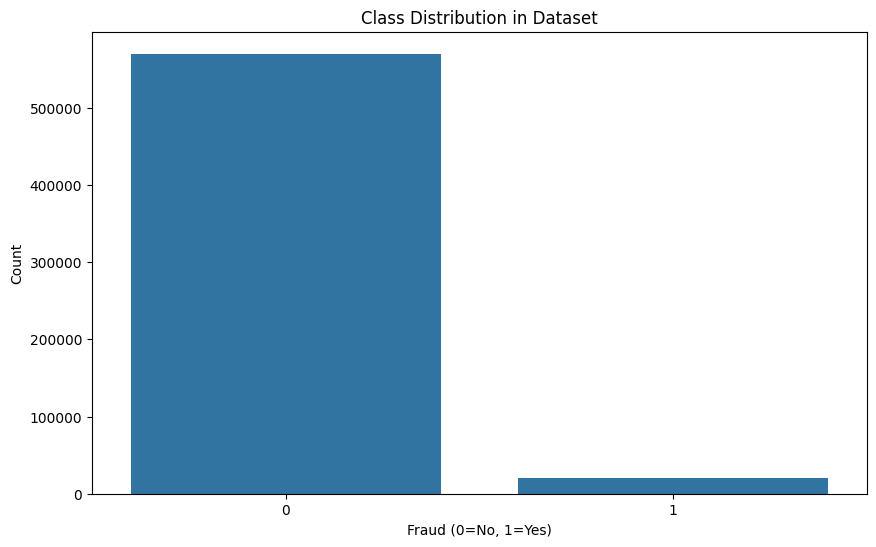

✅ PREPROCESSING COMPLETE!
🏆 CALCULATING INITIAL FEATURE IMPORTANCE


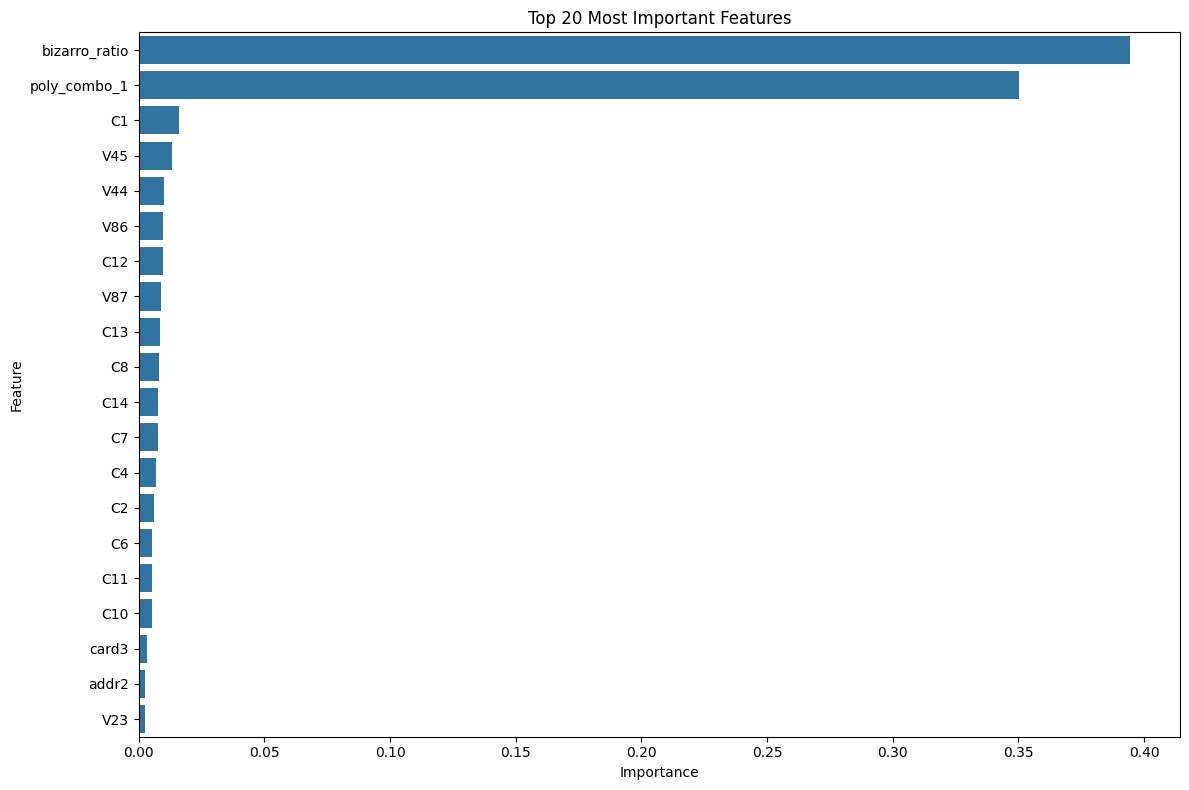

{'X_train':         TransactionID  TransactionDT  TransactionAmt     card1     card2  \
 40809       -1.492663      -1.378280       -0.146458 -0.759357  0.263595   
 285886      -0.055044      -0.078857       -0.439188 -0.407808 -0.036769   
 104256      -1.120483      -1.148048       -0.113217  0.365477 -1.338344   
 507860       1.247054       1.283768        0.447072 -1.485919 -0.136890   
 196382      -0.580073      -0.641085       -0.075376  0.791907 -0.298196   
 ...               ...            ...             ...       ...       ...   
 324259       0.170052       0.140193       -0.317889  0.121250  0.575083   
 532790       1.393293       1.445613       -0.477183 -0.878104  1.075689   
 29747       -1.557552      -1.433225        1.107920 -0.115021  0.118975   
 573130       1.629927       1.698615       -0.496203 -1.376149  0.313655   
 337290       0.246492       0.199497        0.380381 -1.112538  1.131311   
 
            card3     card5     addr1     addr2     dist1  ... 

In [30]:
# Complete preprocessing pipeline for wild_df with encoding, imputation and train-test splitting

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns

print("🧪 FINAL PREPROCESSING AND TRAIN-TEST SPLITTING 🧪")

# First, separate features and target
if 'isFraud' in wild_df.columns:
    X = wild_df.drop('isFraud', axis=1)
    y = wild_df['isFraud']
    print(f"Target variable 'isFraud' separated. Shape of X: {X.shape}, Shape of y: {y.shape}")
else:
    X = wild_df
    y = None
    print("No target variable found. Preprocessing only features.")

# Handle remaining categorical columns (including those created in wild preprocessing)
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

print(f"Categorical features: {len(cat_cols)}")
print(f"Numerical features: {len(num_cols)}")

# 1. ADVANCED IMPUTATION FOR REMAINING MISSING VALUES
print("🔍 PERFORMING ADVANCED IMPUTATION")

# Create imputation pipeline for numeric columns
num_imputer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5, weights='distance')),  # KNN imputation for numeric data
])

# Create imputation pipeline for categorical columns
cat_imputer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Most frequent imputation for categorical
])

# 2. ENCODING CATEGORICAL VARIABLES
print("🏷️ ENCODING CATEGORICAL VARIABLES")

# Check if we have any remaining categorical columns
if cat_cols:
    # Use Target Encoder for categorical vars if we have a target
    if y is not None:
        cat_encoder = ce.TargetEncoder()
        
        # Fit the encoder on training data
        for col in cat_cols:
            if X[col].nunique() > 1:  # Only encode if column has more than one value
                try:
                    X[f"{col}_encoded"] = cat_encoder.fit_transform(X[col], y)
                except:
                    print(f"Could not target encode {col}, using one-hot instead")
                    # Fallback to one-hot for problematic columns
                    dummies = pd.get_dummies(X[col], prefix=col, drop_first=True)
                    X = pd.concat([X, dummies], axis=1)
    else:
        # If no target, use one-hot encoding
        for col in cat_cols:
            if X[col].nunique() <= 30:  # Only one-hot encode if not too many categories
                dummies = pd.get_dummies(X[col], prefix=col, drop_first=True)
                X = pd.concat([X, dummies], axis=1)
            else:
                # For high cardinality, use frequency encoding
                freq = X[col].value_counts(normalize=True)
                X[f"{col}_freq"] = X[col].map(freq)

    # Drop original categorical columns after encoding
    X = X.drop(columns=cat_cols)
    
    # Update numerical columns list after encoding
    num_cols = X.select_dtypes(include=['number']).columns.tolist()
    print(f"After encoding: {X.shape[1]} total features")

# 3. SCALING NUMERICAL FEATURES
print("📏 SCALING NUMERICAL FEATURES")

# Use robust scaling for numerical features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# 4. FINAL CLEANUP
print("🧹 FINAL CLEANUP")

# Drop any columns with high percentage of missing values (>80%)
missing_percentage = X.isnull().mean()
cols_to_drop = missing_percentage[missing_percentage > 0.8].index
X = X.drop(columns=cols_to_drop, errors='ignore')

# 5. TRAIN-TEST SPLIT
print("✂️ PERFORMING TRAIN-TEST SPLIT")

if y is not None:
    # Split with stratification if we have target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Train set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    
    # Check class distribution
    train_fraud_percent = y_train.mean() * 100
    test_fraud_percent = y_test.mean() * 100
    
    print(f"Fraud cases in train set: {train_fraud_percent:.2f}%")
    print(f"Fraud cases in test set: {test_fraud_percent:.2f}%")
    
    # Visualize class imbalance
    plt.figure(figsize=(10, 6))
    sns.countplot(x=y)
    plt.title('Class Distribution in Dataset')
    plt.xlabel('Fraud (0=No, 1=Yes)')
    plt.ylabel('Count')
    plt.show()
    
    # Return preprocessed datasets
    print("✅ PREPROCESSING COMPLETE!")
    preprocessed_data = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'feature_names': X.columns.tolist()
    }
else:
    # If no target, just return preprocessed features
    print("✅ PREPROCESSING COMPLETE (no target variable)!")
    preprocessed_data = {
        'X': X,
        'feature_names': X.columns.tolist()
    }

# Display feature importance if target available
if y is not None:
    from sklearn.ensemble import RandomForestClassifier
    
    print("🏆 CALCULATING INITIAL FEATURE IMPORTANCE")
    
    # Train a quick random forest to get feature importance
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    # Get feature importances
    importances = rf.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Display top 20 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
    plt.title('Top 20 Most Important Features')
    plt.tight_layout()
    plt.show()
    
    # Save feature importance to the output dict
    preprocessed_data['feature_importance'] = feature_importance

preprocessed_data

In [31]:
wild_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,quantile_TransactionDT,anomaly_TransactionDT,quantile_TransactionAmt,anomaly_TransactionAmt,quantile_card1,anomaly_card1,total_anomalies,feature_entropy,poly_combo_1,bizarro_ratio
0,2987000,0,86400,68.50,W,13926,-361.0,150.0,discover,142.0,...,-5.199338,1,0.008782,0,0.631608,0,2,0.728869,0.0,2.987000e+11
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,-5.199338,1,-1.121060,0,-1.352402,0,2,0.553694,0.0,2.987001e+11
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,-4.344948,1,-0.118204,0,-0.892038,0,2,0.640140,0.0,2.987002e+11
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,-4.264035,1,-0.425228,0,2.144011,0,2,1.329453,0.0,2.987003e+11
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,-4.248602,1,-0.425228,0,-0.915513,0,2,0.639658,0.0,2.987004e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,-361.0,150.0,visa,226.0,...,5.199338,1,-0.507774,0,-0.576075,0,2,0.856968,0.0,3.577535e+11
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,5.199338,1,-0.711801,0,0.094134,0,2,0.618533,0.0,3.577536e+11
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,5.199338,1,-0.995858,0,0.317650,0,2,0.654525,0.0,3.577537e+11
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,5.199338,1,0.577557,0,-0.374936,0,2,1.276238,0.0,3.577538e+11


In [33]:
X_train

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,anomaly_card1,total_anomalies,feature_entropy,poly_combo_1,bizarro_ratio,ProductCD_encoded,card4_encoded,card6_encoded,P_emaildomain_encoded,M6_encoded
40809,-1.492663,-1.378280,-0.146458,-0.759357,0.263595,-0.124132,-0.845993,0.186234,0.357091,-0.208987,...,-0.121773,-0.190287,-0.700623,-0.189476,-0.222341,0.091659,-1.369920,1.721517,-0.810245,1.565098
285886,-0.055044,-0.078857,-0.439188,-0.407808,-0.036769,-0.124132,0.508716,-0.393316,0.357091,-0.159853,...,-0.121773,-0.190287,-1.070766,-0.189476,0.169196,-0.471579,-0.143501,-0.580911,0.588442,-0.495657
104256,-1.120483,-1.148048,-0.113217,0.365477,-1.338344,-0.124132,0.545330,-0.163412,0.357091,-0.208987,...,-0.121773,-0.190287,0.110932,-0.189476,-0.120978,-0.471579,-0.050931,1.721517,-0.261823,-0.786899
507860,1.247054,1.283768,0.447072,-1.485919,-0.136890,-0.124132,-1.724723,0.502353,0.357091,-0.163947,...,-0.121773,-0.190287,-0.634666,-0.189476,0.523823,-0.471579,9.208426,1.721517,-0.375308,-0.786899
196382,-0.580073,-0.641085,-0.075376,0.791907,-0.298196,-0.124132,0.545330,1.034006,0.357091,-0.155758,...,-0.121773,-0.190287,0.986917,-0.189476,0.026204,-0.471579,-0.050931,-0.580911,-0.375308,-0.495657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324259,0.170052,0.140193,-0.317889,0.121250,0.575083,-0.124132,-1.285358,-0.489109,0.357091,-0.208987,...,-0.121773,-0.190287,-0.568717,-0.189476,0.230501,-0.471579,-0.143501,-0.580911,0.588442,-0.786899
532790,1.393293,1.445613,-0.477183,-0.878104,1.075689,1.692619,-1.065676,-2.510351,-2.823197,-0.208987,...,-0.121773,-0.190287,-0.484356,-0.189476,0.563652,2.646506,-0.050931,-0.580911,1.235913,1.565098
29747,-1.557552,-1.433225,1.107920,-0.115021,0.118975,-0.124132,0.545330,-0.230467,0.357091,-0.208987,...,-0.121773,-0.190287,1.336594,-0.189476,-0.240014,-0.471579,-0.050931,-0.580911,-0.375308,-0.786899
573130,1.629927,1.698615,-0.496203,-1.376149,0.313655,1.692619,0.508716,-2.510351,-2.823197,-0.208987,...,-0.121773,-0.190287,-0.117155,6.117119,-5.059536,2.646506,-0.143501,-0.580911,1.235913,1.565098
